<a href="https://colab.research.google.com/github/albert-mjoy/Attendance-Wars/blob/master/mnist_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Setup & Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

# For reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [2]:
# 2. Load Dataset (Choose MNIST or Fashion-MNIST)

# Uncomment ONE of the following datasets:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


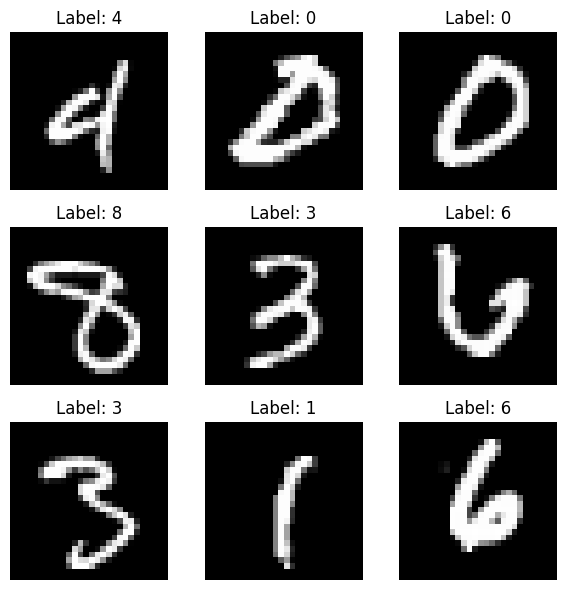

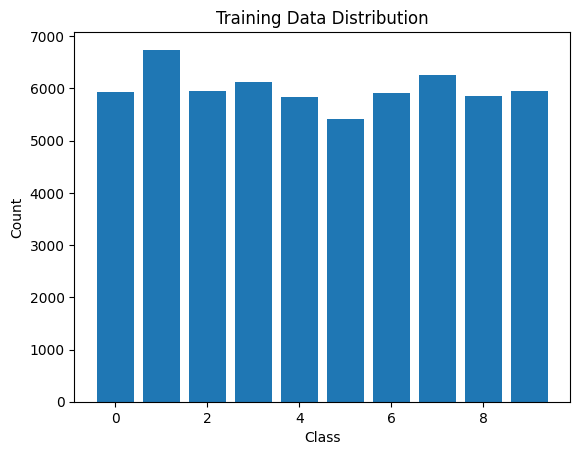

In [3]:
# 3. Data Exploration & Visualization

# Show 9 random images from training set
plt.figure(figsize=(6,6))
for i in range(9):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Distribution")
plt.show()


In [4]:
# 4. Preprocessing

# Scale to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Add channel dimension (for CNNs)
x_train = np.expand_dims(x_train, -1)  # (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)

print("Processed training shape:", x_train.shape)


Processed training shape: (60000, 28, 28, 1)


In [5]:
# 5. Build Neural Network Model

model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 6. Train Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
mc = ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[es, mc],
    verbose=1
)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 55s 63ms/step - accuracy: 0.8893 - loss: 0.3691 - val_accuracy: 0.9833 - val_loss: 0.0542
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9860 - val_loss: 0.0475
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9868 - val_loss: 0.0487
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9930 - loss: 0.0239 - val_accuracy: 0.9888 - val_loss: 0.0468
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - accuracy: 0.9948 - loss: 0.0175 - val_accuracy: 0.9900 - val_loss: 0.0420
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 0.9905 - val_loss: 0.0500
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9900 - val_loss: 0.0433
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9973 - loss: 0.0084 - 

✅ Test Accuracy: 0.9886
Test Loss: 0.0334


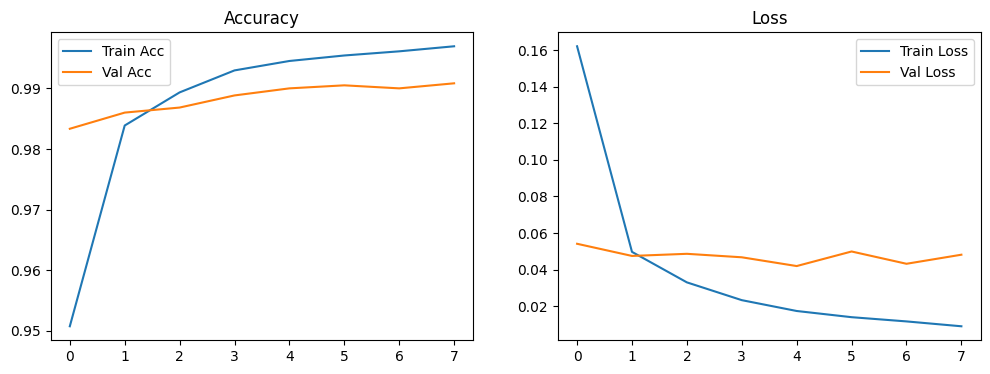

In [7]:
# 7. Evaluate Model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot accuracy & loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


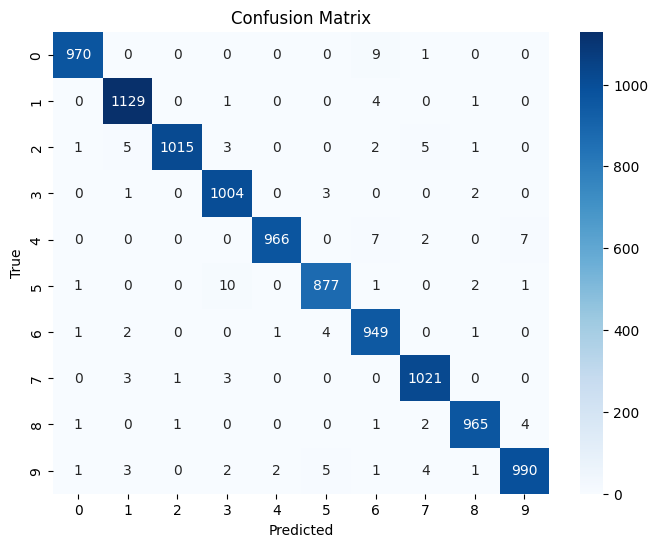

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
# 8. Confusion Matrix & Classification Report

y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


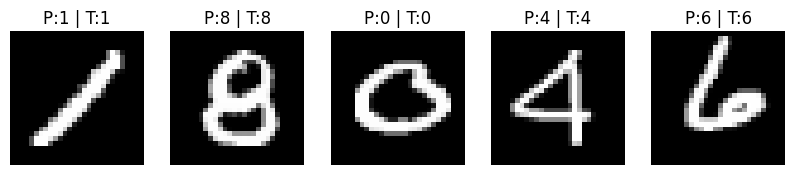

In [9]:
# 9. Test on a Few Random Samples
idxs = np.random.choice(len(x_test), size=5, replace=False)
sample_images = x_test[idxs]
sample_labels = y_test[idxs]

preds = model.predict(sample_images).argmax(axis=1)

plt.figure(figsize=(10,2))
for i, img in enumerate(sample_images):
    plt.subplot(1,5,i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"P:{preds[i]} | T:{sample_labels[i]}")
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


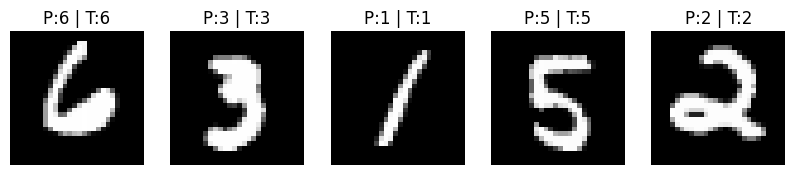

In [10]:
# 9. Test on a Few Random Samples
idxs = np.random.choice(len(x_test), size=5, replace=False)
sample_images = x_test[idxs]
sample_labels = y_test[idxs]

preds = model.predict(sample_images).argmax(axis=1)

plt.figure(figsize=(10,2))
for i, img in enumerate(sample_images):
    plt.subplot(1,5,i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"P:{preds[i]} | T:{sample_labels[i]}")
    plt.axis('off')
plt.show()


In [11]:
# 10. Save the Trained Model
model.save("final_mnist_model.keras")
print("✅ Model saved as final_mnist_model.keras")


✅ Model saved as final_mnist_model.keras


Saving 7 digit image.jpg to 7 digit image.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


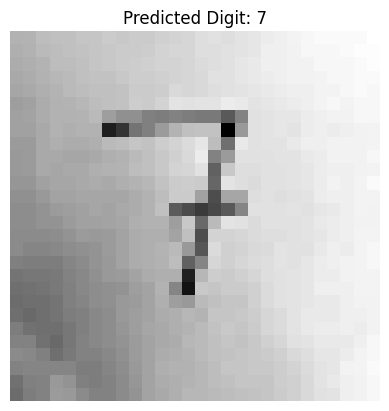

In [12]:
# 11. Upload Your Own Image for Prediction
from google.colab import files
from PIL import Image

uploaded = files.upload()  # Upload a digit image (28x28 or larger)

for filename in uploaded.keys():
    img = Image.open(filename).convert("L")   # Convert to grayscale
    img = img.resize((28,28))                 # Resize
    img_array = np.array(img)
    img_array = 255 - img_array               # Invert colors if needed
    img_array = img_array.astype("float32") / 255.0
    img_array = img_array.reshape(1,28,28,1)

    pred = model.predict(img_array).argmax(axis=1)[0]
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {pred}")
    plt.axis("off")
    plt.show()
